## Import thư viện

In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# YOUR CODE HERE (OPTION) 
# If you need other libraries, you can import them here
import seaborn as sns
from itertools import chain
from collections import Counter
from wordcloud import WordCloud
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px
pd.options.display.float_format = '{:10,.2f}'.format
plt.rcParams.update({'font.size': 12})

## Khám phá dữ liệu

### Đọc dữ liệu đã xử lý ở bước Tiền xử lý

In [2]:
movies_df = pd.read_csv('./data/processed/processed_data.csv')
movies_df.head(5)

title  domestic_revenue  world_revenue  \
0          Batman Returns         162831698      266831698   
1               Evolution          38345494       98376292   
2                 Jumanji         100475249      100475249   
3  The American President          60079496       60079496   
4        Mulholland Drive           7220243       20117339   

                         distributor  opening_revenue   MPAA  \
0                       Warner Bros.    45,687,711.00  PG-13   
1            DreamWorks Distribution    13,408,351.00  PG-13   
2  Sony Pictures Entertainment (SPE)    11,084,370.00     PG   
3  Sony Pictures Entertainment (SPE)    10,014,558.00  PG-13   
4                 Universal Pictures       587,591.00      R   

                            genres  running_time  in_release release_date  
0             Action,Crime,Fantasy        126.00      196.00   1992-06-19  
1                    Comedy,Sci-Fi        101.00      207.00   2001-06-08  
2  Adventure,Comedy,Family,Fantasy        104.00      383.00   1995-12-15  
3             Comedy,Drama,Romance        114.00      411.00   1995-11-17  
4           Drama,Mystery,Thriller        147.00      450.00   2001-10-08

In [3]:
movies_df.shape

(4760, 10)

### Phân tích dữ liệu số bằng cách sử dụng thống kê mô tả

In [4]:
numeric_cols = movies_df.select_dtypes(include=np.number).columns.tolist()
df_copy = movies_df[numeric_cols]

def lower_quartile(series):
    return series.quantile(0.25)
    
def upper_quartile(series):
    return series.quantile(0.75)

def variance(series):
    return series.var()

def standard_deviation(series):
    return series.std()
    
def coefficient_of_variation(series):
    return (series.std()/series.mean())
    
def covariance(df: pd.DataFrame):
    return df.cov()
    
def correlation(df: pd.DataFrame):
    return df.corr()

column_statistics = df_copy.agg(['mean','min','max', lower_quartile, 'median', upper_quartile, variance, standard_deviation, coefficient_of_variation])
column_statistics

domestic_revenue             world_revenue  \
mean                                49,143,067.24            104,921,959.17   
min                                    153,504.00                153,504.00   
max                                936,662,225.00          2,799,439,100.00   
lower_quartile                       7,717,249.25             11,551,724.25   
median                              23,996,136.50             36,603,052.00   
upper_quartile                      58,501,502.50            104,933,572.75   
variance                 5,562,015,499,736,306.00 39,050,629,865,391,808.00   
standard_deviation                  74,578,921.28            197,612,322.15   
coefficient_of_variation                     1.52                      1.88   

                                opening_revenue  running_time  in_release  
mean                              14,642,454.85        107.75      259.04  
min                                    4,009.00         42.00       21.00  
max                              357,115,007.00        271.00      996.00  
lower_quartile                     2,507,356.00         96.00      155.00  
median                             7,806,186.50        105.00      259.00  
upper_quartile                    17,102,618.50        117.00      349.00  
variance                 532,883,543,945,460.25        313.67   14,341.34  
standard_deviation                23,084,270.49         17.71      119.76  
coefficient_of_variation                   1.58          0.16        0.46

### Sự tương quan và mỗi liên hệ giữa các biến

In [5]:
df_copy
corr_matrix = df_copy.corr().round(1)
corr_matrix

domestic_revenue  world_revenue  opening_revenue  \
domestic_revenue              1.00           0.90             0.90   
world_revenue                 0.90           1.00             0.90   
opening_revenue               0.90           0.90             1.00   
running_time                  0.30           0.30             0.30   
in_release                    0.20           0.10             0.10   

                  running_time  in_release  
domestic_revenue          0.30        0.20  
world_revenue             0.30        0.10  
opening_revenue           0.30        0.10  
running_time              1.00        0.10  
in_release                0.10        1.00

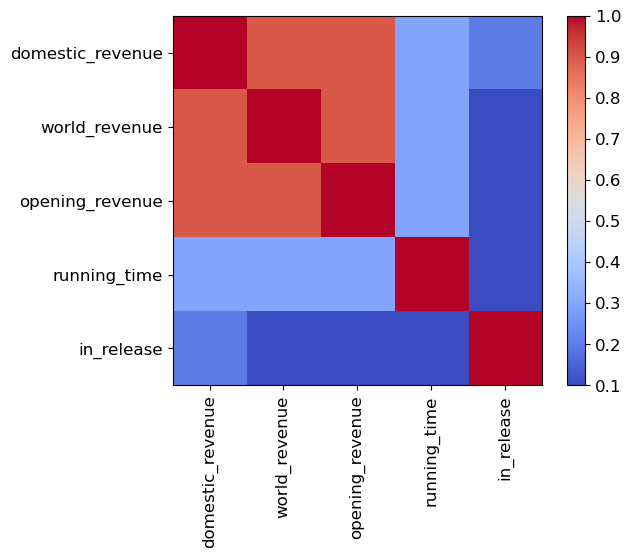

In [6]:
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(np.arange(len(corr_matrix.index)), corr_matrix.index)

plt.show()

## Đặt câu hỏi

#### Câu 1: Phân tích mối tương quan giữa các thể loại và tổng doanh thu của các phim từ năm 1990 đến 2022. Xu hướng phát triển của ngành công nghiệp điện ảnh thay đổi như thế nào? Liệu những thể loại phim được sản xuất nhiều có mang lại doanh thu lớn?
- Ý nghĩa khi trả lời câu hỏi:
  - Có thể biết được xu hướng và sự phát triển của các thể loại phim trong ngành công nghiệp điện ảnh. Hiểu được thể loại nào là thể loại ưa chuộng của người xem thông qua số lượng thể loại được sản xuất từng khoảng thời gian.
  - Biết được thể loại nào mang lại doanh thu cao nhất từ trước đến nay. 

In [7]:
components = movies_df['genres'].str.split(',').tolist() 
temp_list = list(chain.from_iterable(components)) 
genres_counter = Counter(temp_list)
genres_dict = dict(genres_counter)
genres_dict.keys()

dict_keys(['Action', 'Crime', 'Fantasy', 'Comedy', 'Sci-Fi', 'Adventure', 'Family', 'Drama', 'Romance', 'Mystery', 'Thriller', 'Biography', 'History', 'Western', 'Musical', 'Sport', 'Documentary', 'Music', 'War', 'Horror', 'News', 'Animation', 'Film-Noir', 'Short'])

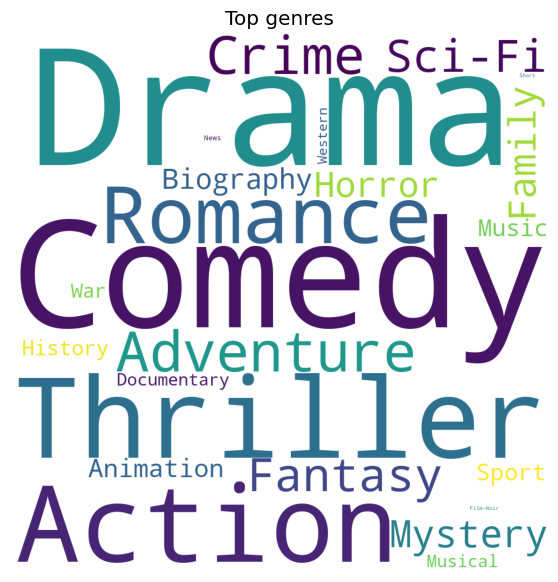

In [8]:
plt.figure(figsize = (7, 7))
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=len(genres_dict),relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(genres_dict)
plt.imshow(wc)
plt.title('Top genres')
plt.axis("off")
plt.show()

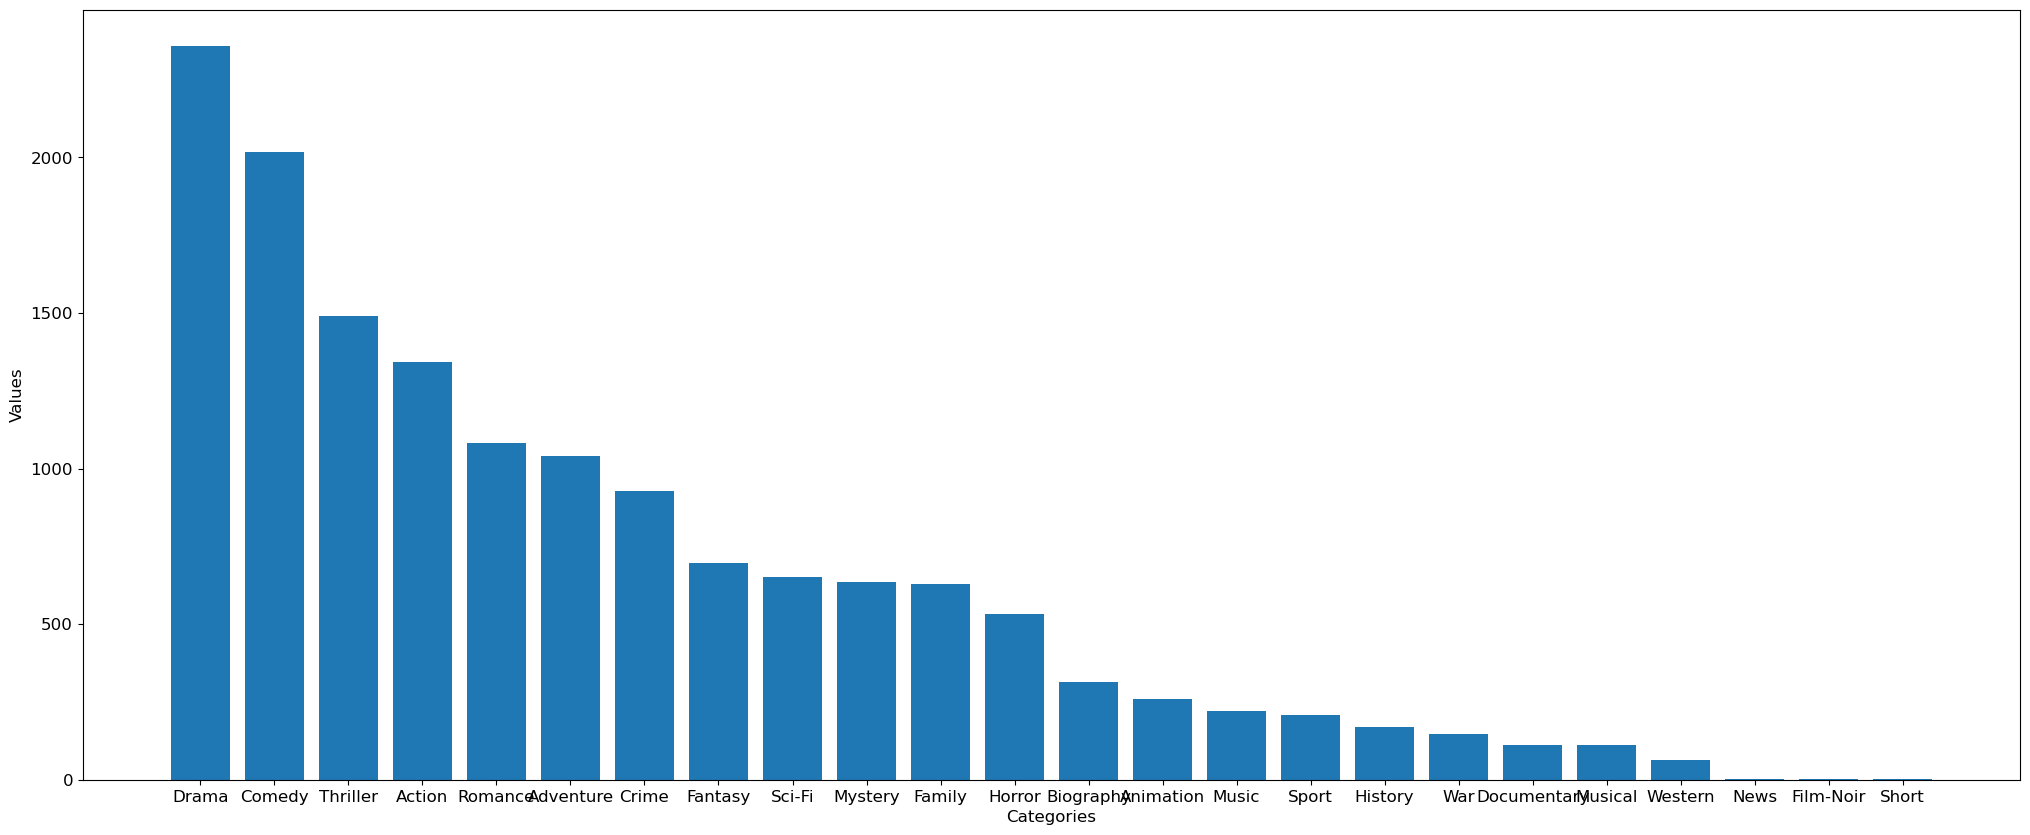

In [9]:
fig =plt.subplots(figsize=(25,10))

genres_dict = dict(sorted(genres_dict.items(), key=lambda item: item[1], reverse=True))
genre=list(genres_dict.keys())
num_film=list(genres_dict.values())

# Vẽ bar plot
plt.bar(genre, num_film)

# Thêm tiêu đề và nhãn cho trục x, y

plt.xlabel('Categories')
plt.ylabel('Values')

# Hiển thị biểu đồ
plt.show()

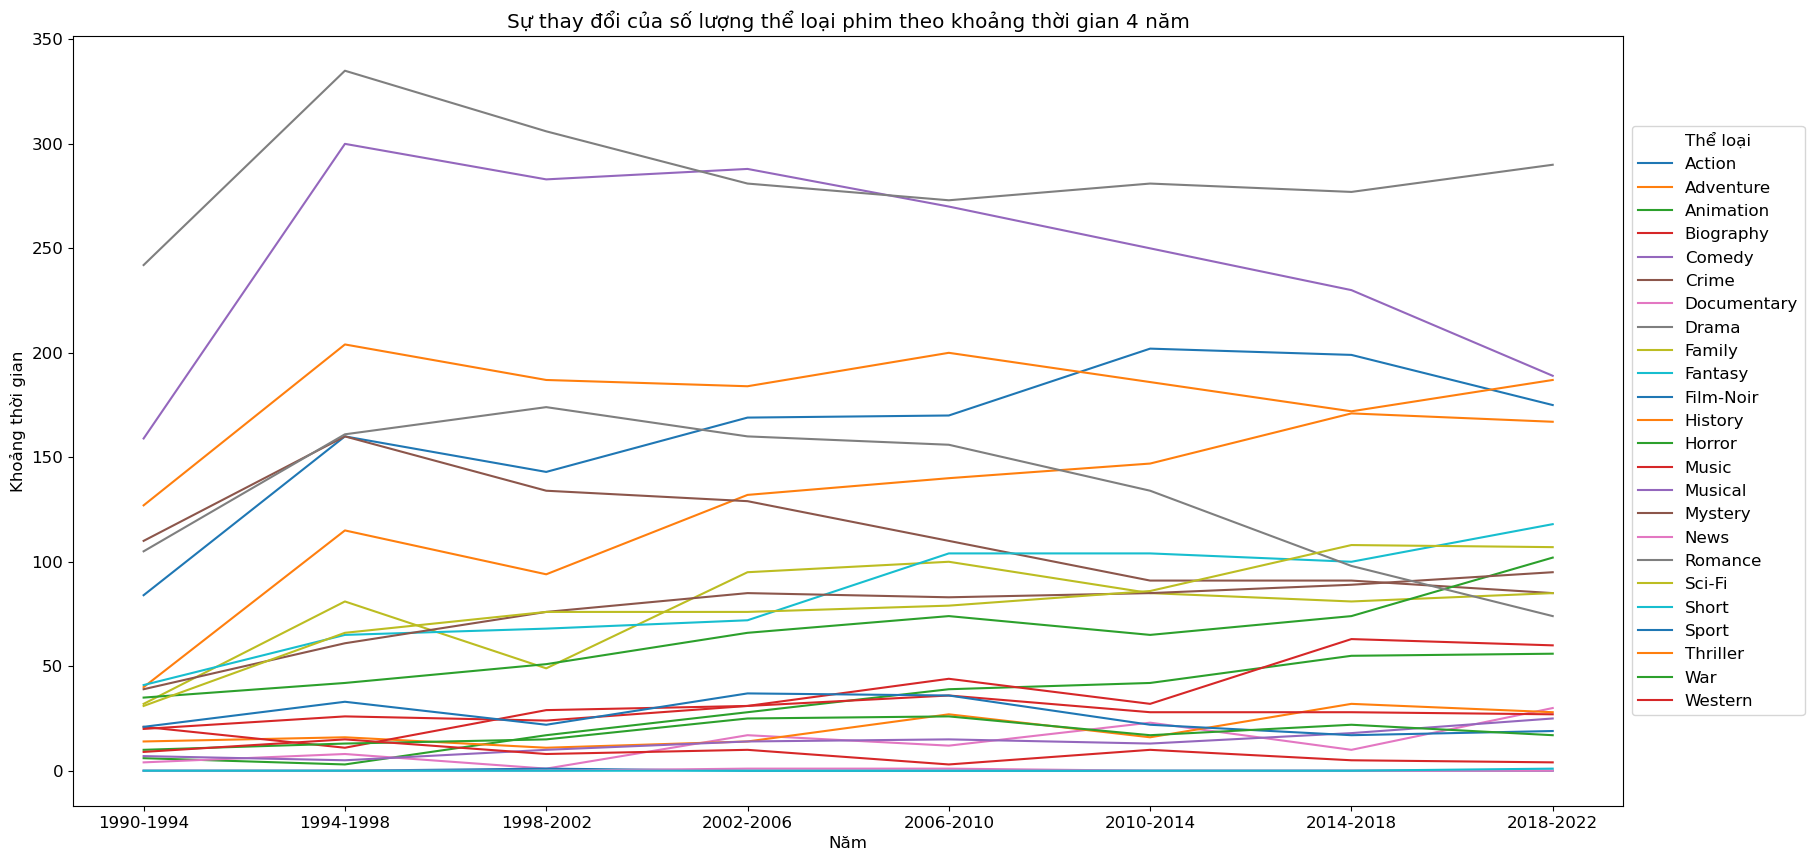

In [10]:
# Tạo cột 'release_year_bin' để phân loại năm vào các khoảng 4 năm
year_ranges = ['1990-1994','1994-1998','1998-2002','2002-2006','2006-2010','2010-2014','2014-2018','2018-2022']
x_positions = list(range(len(year_ranges)))

df_copy = movies_df.copy()
df_copy['release_date'] = pd.to_datetime(df_copy['release_date'])
df_copy['release_year'] = df_copy['release_date'].dt.year
df_copy['release_year_bin'] = pd.cut(df_copy['release_year'], bins=range(df_copy['release_year'].min(), df_copy['release_year'].max(), 4), labels=False)

# Tạo các biến giả cho thể loại phim
genres_dummies = df_copy['genres'].str.get_dummies(',')

# Ghép các biến giả vào DataFrame
df_copy = pd.concat([df_copy, genres_dummies], axis=1)

# Gom nhóm và tính tổng số lượng mỗi thể loại trong từng khoảng thời gian
grouped_data = df_copy.groupby('release_year_bin')[genres_dummies.columns].sum()

fig =plt.subplots(figsize=(20,10))
plt.plot(grouped_data)
plt.xlabel('Năm')
plt.ylabel('Khoảng thời gian')
plt.xticks(x_positions,year_ranges)
plt.title('Sự thay đổi của số lượng thể loại phim theo khoảng thời gian 4 năm')
plt.legend(grouped_data.columns,title='Thể loại',loc='center left',bbox_to_anchor=(1.0,0.5))
plt.show()

Từ biểu đồ cột trên, ta thấy rằng:
- Từ năm 1990 đến 2022, thể loại `Drama(Chính kịch)` là thể loại được nhiều nhà sản xuất phim quan tâm nhất. Theo sau là các thể loại `Hài kịch`, `Giật gân` và `Hành động`. Thật vậy, những thể loại trên mang tính giải trí cao nên việc được quan tâm và yêu thích là điều hiển nhiên!
- Hơn nữa, xu hướng sản xuất phim mang thể loại `Chính kịch` vẫn luôn tăng theo từng năm, mặc dù ở số lượng phim được sản xuất giảm đi so với khoảng 1994-1998 nhưng thể loại này đang có xu hướng tăng lên lại trong tương lai.
- Việc một thể loại phim phổ biến có thể phản ánh cả nhu cầu của thị trường. Qua đó một phần có thể xem `Chính kịch` là thể loại được ưa chuộng nhất.

Tuy nhiên việc trực quan hóa trên chỉ cho ta biết được thể loại phim nào phổ biến nhất từ trước đến nay, chưa thể biết được thể loại nào đem lại doanh thu lớn nhất.

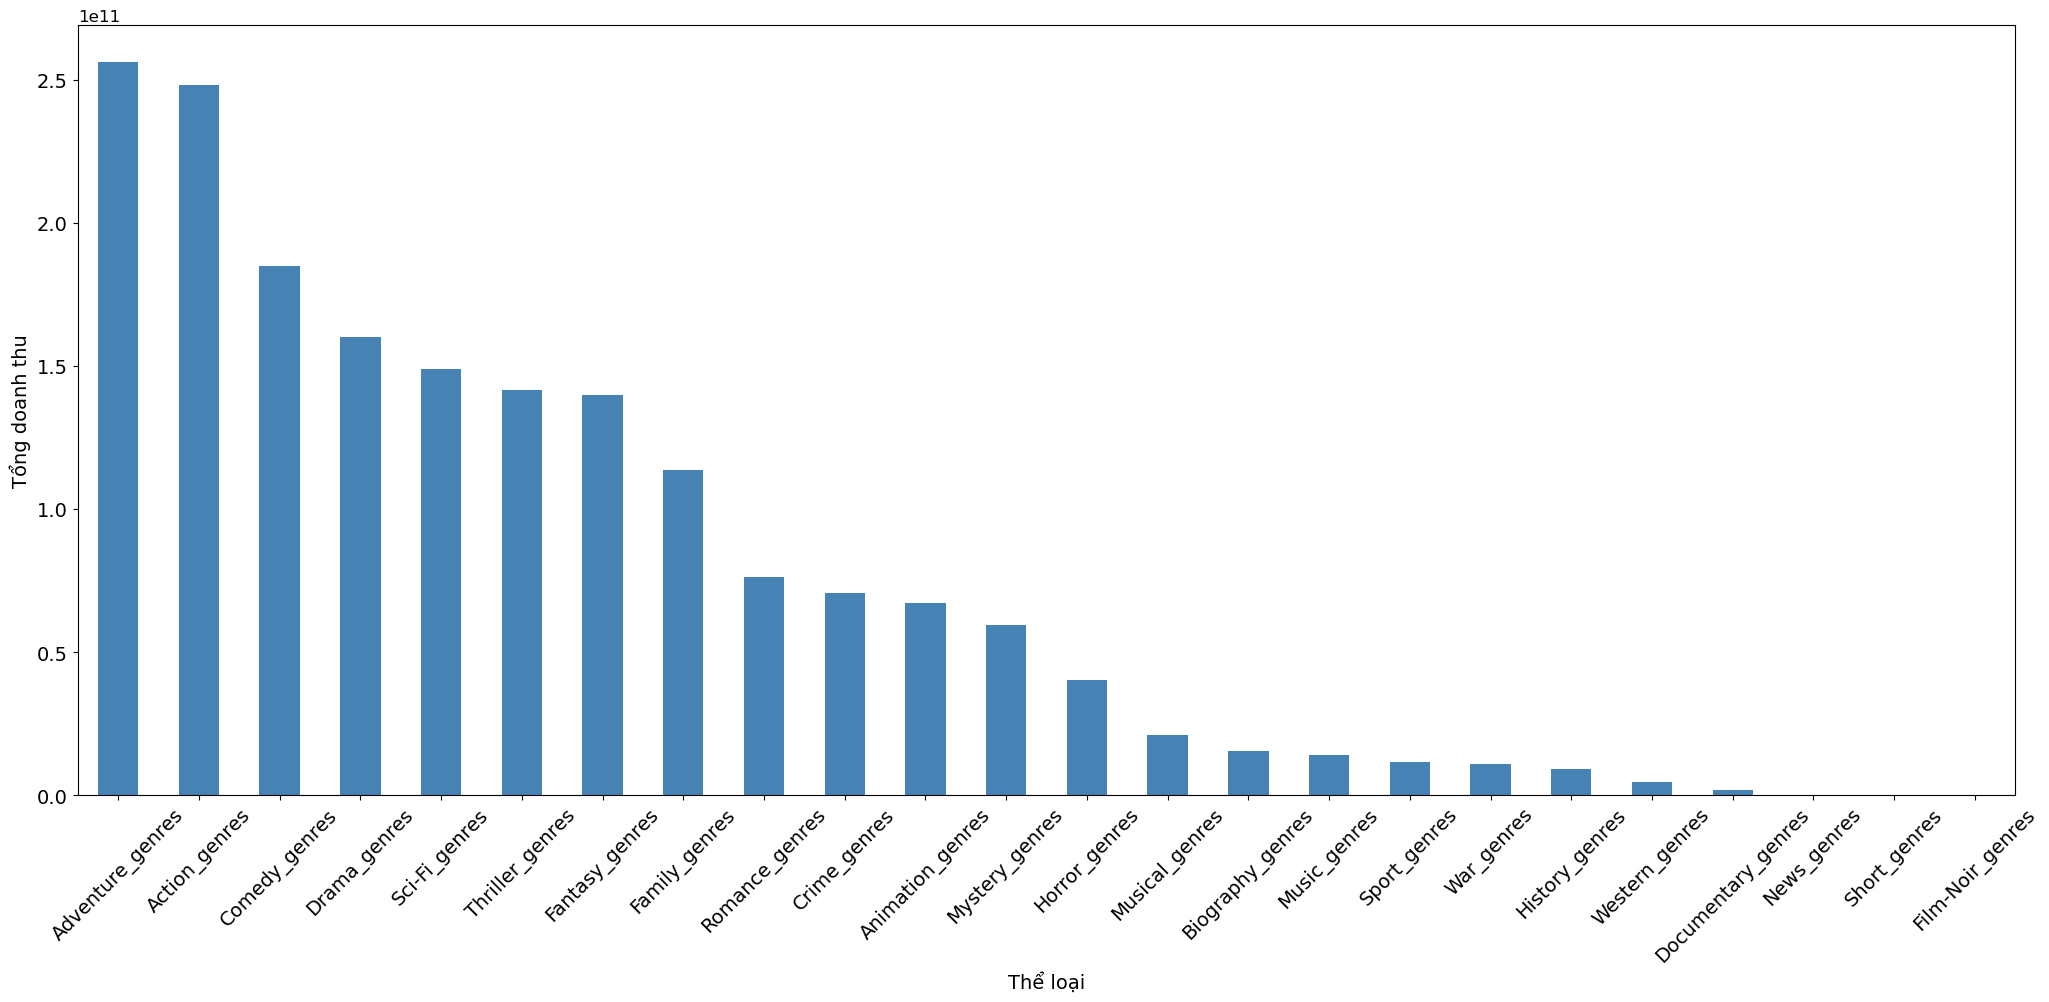

In [11]:
df_copy = movies_df.copy()
df_encoded = df_copy['genres'].str.get_dummies(',')
df_encoded.columns = [col + '_genres' for col in df_encoded.columns]
temp_df = pd.concat([movies_df['world_revenue'],df_encoded],axis=1)

genre_cols = [col for col in temp_df.columns if '_genres' in col]

sum_list = []
for col in genre_cols:
    sum = temp_df.loc[temp_df[col] == 1, 'world_revenue'].sum()
    sum_list.append(sum)
result_df = pd.DataFrame({"Genres": genre_cols, "Sum_Revenue": sum_list})

result_df = result_df.sort_values(by=['Sum_Revenue'],ascending=False)


# Vẽ bar plot
fig, ax = plt.subplots(figsize=(25, 10))
result_df.plot(kind='bar',
        x='Genres',
        y='Sum_Revenue',
        color='steelblue',
        ax=ax,
        legend=None,
        fontsize=14)


plt.xlabel('Thể loại',fontsize=14)
plt.ylabel('Tổng doanh thu',fontsize=14)
plt.xticks(rotation=45)
plt.show()

Mặc dù thể loại `Phiêu lưu` không phải là thể loại được sản xuất nhiều nhất từ trước đến nay nhưng `Phiêu lưu` là thể loại mang lại doanh thu cao nhất trong tất cả các thể loại trên.

Để hiểu rõ hơn về mối liên hệ giữa tổng doanh thu và số lượng thể loại trên mỗi phim, chúng ta cần phải thêm 1 cột đếm số lượng thể loại của mỗi phim:

In [12]:
movies_df['genres_count'] = movies_df['genres'].apply(lambda x: len(x.split(',')) if pd.notna(x) else 0)
movies_df.head(5)

title  domestic_revenue  world_revenue  \
0          Batman Returns         162831698      266831698   
1               Evolution          38345494       98376292   
2                 Jumanji         100475249      100475249   
3  The American President          60079496       60079496   
4        Mulholland Drive           7220243       20117339   

                         distributor  opening_revenue   MPAA  \
0                       Warner Bros.    45,687,711.00  PG-13   
1            DreamWorks Distribution    13,408,351.00  PG-13   
2  Sony Pictures Entertainment (SPE)    11,084,370.00     PG   
3  Sony Pictures Entertainment (SPE)    10,014,558.00  PG-13   
4                 Universal Pictures       587,591.00      R   

                            genres  running_time  in_release release_date  \
0             Action,Crime,Fantasy        126.00      196.00   1992-06-19   
1                    Comedy,Sci-Fi        101.00      207.00   2001-06-08   
2  Adventure,Comedy,Family,Fantasy        104.00      383.00   1995-12-15   
3             Comedy,Drama,Romance        114.00      411.00   1995-11-17   
4           Drama,Mystery,Thriller        147.00      450.00   2001-10-08   

   genres_count  
0             3  
1             2  
2             4  
3             3  
4             3

Text(0.5, 1.0, 'Revenue for different number of genres in the film')

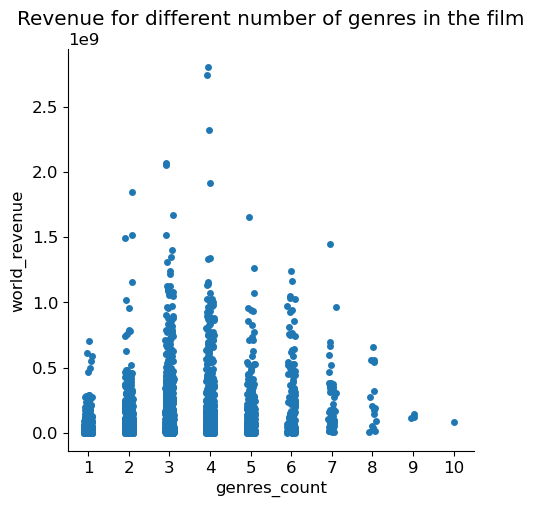

In [13]:
sns.catplot(x='genres_count', y='world_revenue', data=movies_df)
plt.title('Revenue for different number of genres in the film')

Các phim có doanh thu cao chủ yếu có từ 3-5 thể loại

#### **Kết luận:**

- Thể loại được sản xuất và được yêu thích nhiều nhất: **Chính kịch**.
- Top các thể loại yêu thích kế tiếp: **Phiêu lưu, Giật gân, Hài kịch, Hành động**.
- Thể loại mang lại doanh thu lớn nhất: **Phiêu lưu**.
- Để tạo nên một bộ phim mang lại doanh thu cao thì nên có tối thiểu từ 3 đến 6 thể loại trong nó.

### Hãng phim

In [3]:
distributor = movies_df['distributor'].value_counts().to_dict()
distributor

{'Warner Bros.': 572,
 'Universal Pictures': 458,
 'Walt Disney Studios Motion Pictures': 406,
 'Twentieth Century Fox': 404,
 'Sony Pictures Entertainment (SPE)': 357,
 'Paramount Pictures': 338,
 'Lions Gate Films': 236,
 'Miramax': 161,
 'New Line Cinema': 159,
 'Metro-Goldwyn-Mayer (MGM)': 117,
 'Sony Pictures Classics': 92,
 'Focus Features': 91,
 'Fox Searchlight': 85,
 'Screen Gems': 73,
 'TriStar Pictures': 54,
 'DreamWorks Distribution': 53,
 'Columbia Pictures': 44,
 'Roadside Attractions': 42,
 'Open Road Films (II)': 42,
 'Dimension Films': 37,
 'Revolution Studios': 35,
 'DreamWorks': 35,
 'STX Entertainment': 34,
 'The Weinstein Company': 32,
 'Relativity Media': 31,
 'Gramercy Pictures (I)': 29,
 'The Samuel Goldwyn Company': 29,
 'Summit Entertainment': 25,
 'A24': 25,
 'Bleecker Street Media': 25,
 'Neon': 24,
 'Fine Line Features': 22,
 'Artisan Entertainment': 21,
 'IFC Films': 20,
 'United Artists Releasing': 20,
 'Orion Pictures': 17,
 'MGM/Weinstein': 15,
 'Rogue 

### Phân loại phim

In [4]:
mpaa = movies_df['MPAA'].value_counts().to_dict()
mpaa

{'R': 2045,
 'PG-13': 1823,
 'PG': 837,
 'G': 45,
 'NC-17': 6,
 'Not Rated': 2,
 'Approved': 1,
 'TV-14': 1}

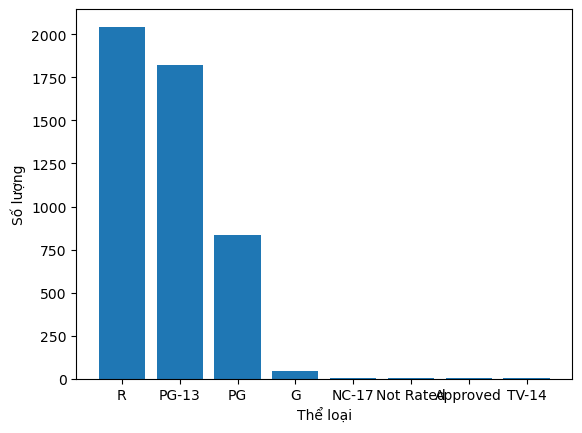

In [5]:
plt.bar(range(len(mpaa)), list(mpaa.values()), align='center')
plt.xticks(range(len(mpaa)), list(mpaa.keys()))

plt.xlabel('Thể loại')
plt.ylabel('Số lượng')
plt.show()

In [ ]:
f, axes = plt.subplots(3, 5, figsize=(24, 12))
plt.suptitle('Violinplot of revenue vs genres')
for i, e in enumerate([col for col in movies_df.columns if 'gen' in col]):
    sns.violinplot(x=e, y='world_revenue', data=train, ax=axes[i // 5][i % 5]);

### Ngày ra mắt

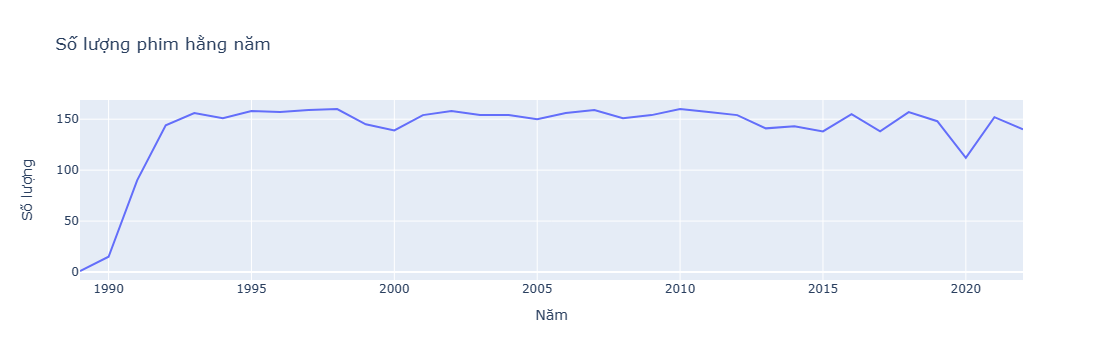

In [8]:
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], format='%Y-%m-%d')
film_counts = movies_df['release_date'].dt.year.value_counts().sort_index()

# Create a plot
fig = px.line(x=film_counts.index, y=film_counts.values, 
              labels={'x': 'Năm', 'y': 'Số lượng'},
              title='Số lượng phim hằng năm')

fig.show()

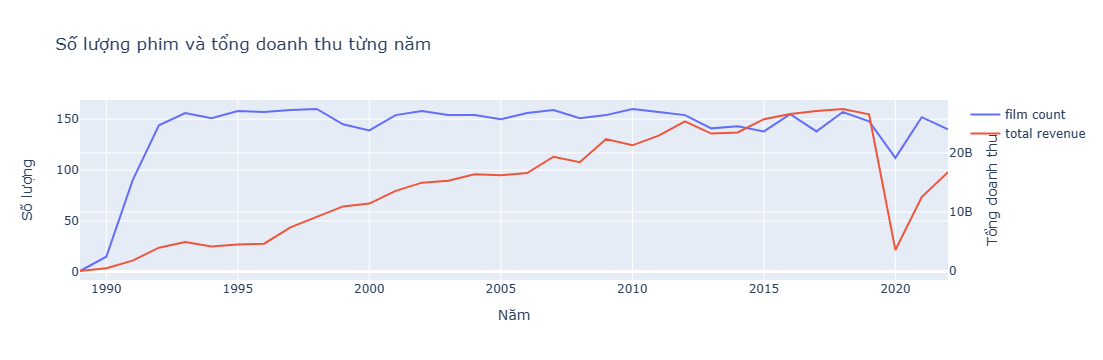

In [9]:
revenue_per_year = movies_df.groupby(movies_df['release_date'].dt.year)['world_revenue'].sum()
data = [go.Scatter(x=film_counts.index, y=film_counts.values, name='film count'), go.Scatter(x=revenue_per_year.index, y=revenue_per_year.values, name='total revenue', yaxis='y2')]
layout = go.Layout(dict(title = "Số lượng phim và tổng doanh thu từng năm",
                  xaxis = dict(title = 'Năm'),
                  yaxis = dict(title = 'Số lượng'),
                  yaxis2=dict(title='Tổng doanh thu', overlaying='y', side='right')
                  ),legend=dict(
                orientation="v"))
py.iplot(dict(data=data, layout=layout))

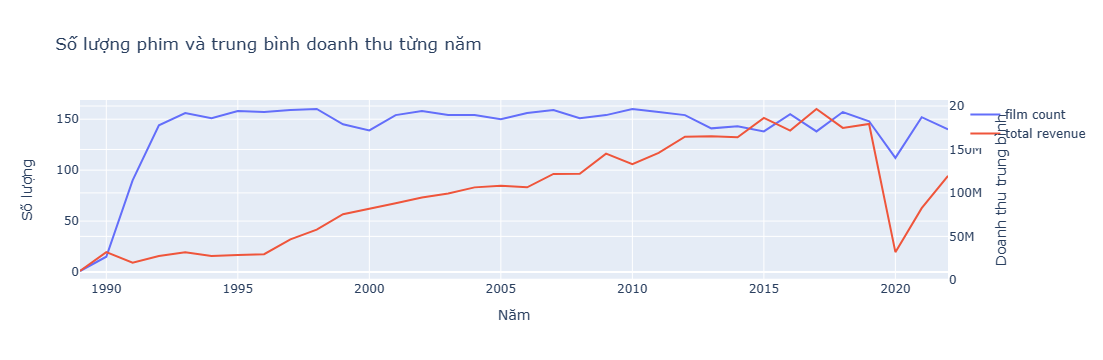

In [10]:
revenue_per_year_mean = movies_df.groupby(movies_df['release_date'].dt.year)['world_revenue'].mean()
data = [go.Scatter(x=film_counts.index, y=film_counts.values, name='film count'), go.Scatter(x=revenue_per_year_mean.index, y=revenue_per_year_mean.values, name='total revenue', yaxis='y2')]
layout = go.Layout(dict(title = "Số lượng phim và trung bình doanh thu từng năm",
                  xaxis = dict(title = 'Năm'),
                  yaxis = dict(title = 'Số lượng'),
                  yaxis2=dict(title='Doanh thu trung bình', overlaying='y', side='right')
                  ),legend=dict(
                orientation="v"))
py.iplot(dict(data=data, layout=layout))

<Figure size 1200x1200 with 0 Axes>

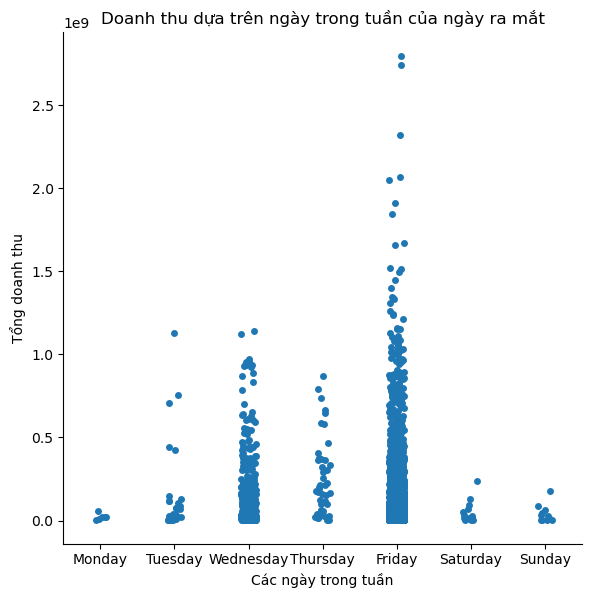

In [11]:
plt.figure(figsize = (12, 12))
movies_df['day_of_week'] = movies_df['release_date'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
temp_df = movies_df[['world_revenue','day_of_week']]
sns.catplot(x='day_of_week', y='world_revenue', data=temp_df,height=6,order=day_order);
plt.title('Doanh thu dựa trên ngày trong tuần của ngày ra mắt');
plt.xlabel('Các ngày trong tuần')
plt.ylabel('Tổng doanh thu')
plt.show()

Dựa vào biểu đồ ta thấy rằng, các bộ phim ra mắt vào thứ Sáu có xu hướng có doanh thu cao hơn so với ra mắt trong các ngày còn lại.

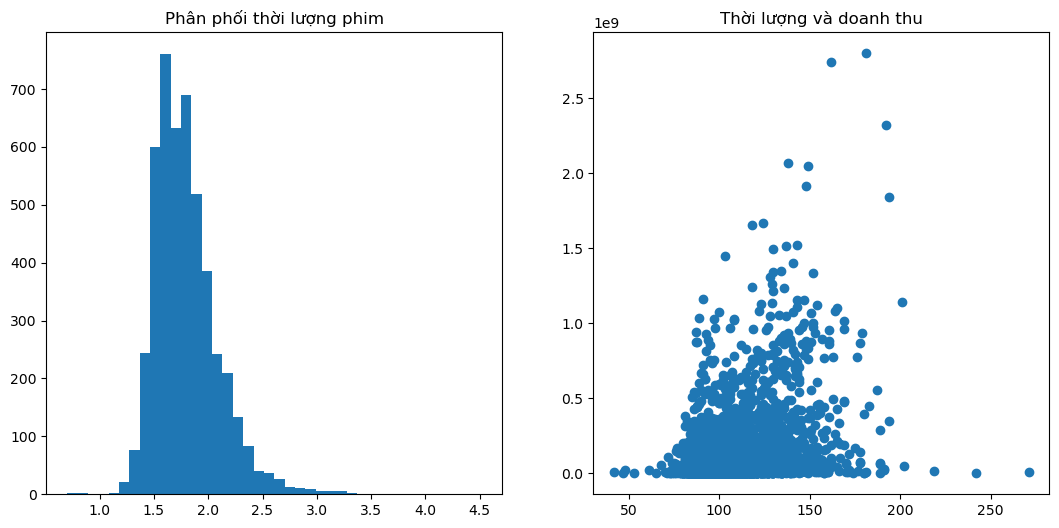

In [14]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.hist(movies_df['running_time'].fillna(0) / 60, bins=40);
plt.title('Phân phối thời lượng phim');
plt.subplot(1, 3, 2)
plt.scatter(movies_df['running_time'].fillna(0), movies_df['world_revenue'])
plt.title('Thời lượng và doanh thu');

Dựa vào 2 biểu đồ phân phối:
- Thời lượng của các phim từ 1990 đến 2020 chủ yếu rơi vào khoảng từ 1,5 tiếng đến 2 tiếng.
- Đồng thời, các bộ phim có doanh thu lớn cũng rơi vào khoảng thời lượng đó.